# Enhancing Customer Product Review Sentiment Analysis through Deep Learning Models Incorporating Acoustic and Textual Features


In [55]:
import pandas as pd
import numpy as np
import plotly.express as px

import re, nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline


In [16]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [56]:
import pandas as pd

# Load Dataset
file_path = "Reviews And Ratings.csv"

# Load the CSV 
df = pd.read_csv(file_path)

# Show the first five rows
df.head(10)


,Unnamed: 0,Rating,Lang,Type,Country,Date,Helpful,translated
0,72,5,it,Verified,Italy,11/1/2020,43.0,What to say? My daughter LOVES him and I with ...
1,85,5,it,Not Verified,Italy,9/10/2019,36.0,"I decided to test this plush to my grandson, j..."
2,107,5,it,Verified,Italy,8/12/2019,2.0,"An unusual pet, this otter is beautiful! Cute ..."
3,109,4,it,Verified,Italy,4/2/2021,1.0,"Beautiful, soft and very relaxing. It comes wi..."
4,113,4,it,Verified,Italy,21/02/2020,2.0,"Plush tender, my 16-month-old loves it, sleeps..."
5,115,5,it,Verified,Italy,12/11/2019,3.0,"I love it, simply. I bought it after seeing it..."
6,116,5,it,Verified,Italy,25/10/2019,5.0,"Beautiful product, the only problem and that t..."
7,125,5,it,Verified,Italy,7/8/2020,2.0,Perfect!! Relaxed very much my son of 4 months...
8,138,5,it,Verified,Italy,25/04/2020,NaN,The otter accompanies the dwarfs of my baby wi...
9,146,2,it,Verified,Italy,23/11/2020,NaN,"Functional carillon, my 4 month old girl falls..."


In [57]:
# Get information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1535 entries, 0 to 1534
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1535 non-null   int64  
 1   Rating      1535 non-null   int64  
 2   Lang        1535 non-null   object 
 3   Type        1535 non-null   object 
 4   Country     1535 non-null   object 
 5   Date        1535 non-null   object 
 6   Helpful     265 non-null    float64
 7   translated  1535 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 96.1+ KB


In [58]:
# Create a histogram using Plotly Express
fig = px.histogram(df, x="Rating", color_discrete_sequence=['orange'], template='plotly_dark')
fig.update_traces(marker_line_color='rgb(255,255,255)', marker_line_width=1.5)
fig.update_layout(title_text='Stars Rating Score', xaxis_title='Rating', yaxis_title='Count')
fig.show()

In [32]:
#WordCloud for dataset and removing stopwords like 'https'
import nltk
from nltk.corpus import stopwords
from spacy.lang.en.stop_words import STOP_WORDS
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create stopword list:
STOP_WORDS.add('otter')
stopwords = set(list(STOP_WORDS) + list(stopwords.words()))
stopwords.update(["br", "href", 'https'])
stopwords.update(stopwords)

# Concatenate the "translated" column to create a single text string
text = " ".join(desc for desc in df.translated)

# Generate WordCloud with a different color (e.g., 'green')
wordcloud = WordCloud(stopwords=stopwords, background_color='white', colormap='viridis').generate(text)

# Display the WordCloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()


TypeError: dataclass_transform() got an unexpected keyword argument 'field_specifiers'

In [21]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [59]:
df = df[df['Rating'] != 0]
#Creating Positive & Negative sentiments as +1 and -1 according to rating
df['sentiment'] = df['Rating'].apply(lambda rating : +1 if rating >= 4 else -1)

In [60]:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]


In [61]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sriha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [62]:
# Remove rows where the "Rating" column is zero
df = df[df['Rating'] != 0]

# Create a new column 'sentiment' based on the 'Rating'
df['sentiment'] = df['Rating'].apply(lambda rating: +1 if rating >= 4 else -1)

# Filter positive samples
positive = df[df['sentiment'] == 1]

# Concatenate the "translated" column to create a single text string for positive samples
positive_text = " ".join(desc for desc in positive.translated)

# Generate WordCloud for positive samples
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Display the WordCloud for positive samples
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.title('WordCloud for Positive Samples')
plt.show()

NameError: name 'WordCloud' is not defined

In [63]:
for i in positive[positive['translated'].str.contains("otter")]['translated'].iloc[:7]:
    print(i, '\n')


What to say? My daughter LOVES him and I with her. Very soft, zero visible seams, tender and especially functional. It reproduces according to the choice of music, white noise, the sound of the Breath or heartbeat. Also the otter tummy lights up and moves as if breathing. For the newborn is a real comfort in the cradle, always kept in safety, I place it away from his face so that he can perceive it even just by touching it with his hand. Wonderful purchase, we are really happy! 

I decided to test this plush to my grandson, just three years old. As soon as he saw it he was very happy and he exclaimed it was: "Zia, it's very soft!" Actually the plush is really soft to the touch and a real companion for the nights, of our children. The animal represented is a gray otter, a toy animal that is able to help children play and also relax, during the night and during the time they rest. This otter is able to emit vibrations that calm and relax the child, but also of music, very sweet. It is su

In [64]:
# Remove rows where the "Rating" column is zero
df = df[df['Rating'] != 0]

# Create a new column 'sentiment' based on the 'Rating'
df['sentiment'] = df['Rating'].apply(lambda rating: +1 if rating >= 4 else -1)

# Filter negative samples
negative = df[df['sentiment'] == -1]

# Concatenate the "translated" column to create a single text string for negative samples
negative_text = " ".join(desc for desc in negative.translated)

# Generate WordCloud for negative samples
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Display the WordCloud for negative samples
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.title('WordCloud for Negative Samples')
plt.show()

NameError: name 'WordCloud' is not defined

In [65]:
#searching negative words that contains the product name i.e. otter
for i in negative[negative['translated'].str.contains("otter")]['translated'].iloc[0:7]:
    print(i,'\n')

The mechanism is a little noisy when “breathing” and if the tummy touches baby when the otter takes a breath, the gentle pressure it creates turns the otter off. But I love the sounds and the light, their is a volume control which is great. Overall I like it, just wish it wasnt as sensitive. 

Super cute toy and very soft. I like that you can choose all the setting to personalize the otter like the sounds, volume, light and so on. The only thing I dont love is when you have the belly function on it make sort of a robotic noise and if baby is holding it tightly it makes a clicking noise as it tries to move. Overall great toy but a little bit pricey for a musical stuffed animal. 

The controller inside of otter is too chunky and hard. I was expecting very soft snuggly toy for nighttime. my 1 1/2 old throw it out from crib all the time. She doesn’t like it.... :(  other than that, it works fine. 

The button to activate this is on the otter's tummy and very sensitive.  So, if my upset bab

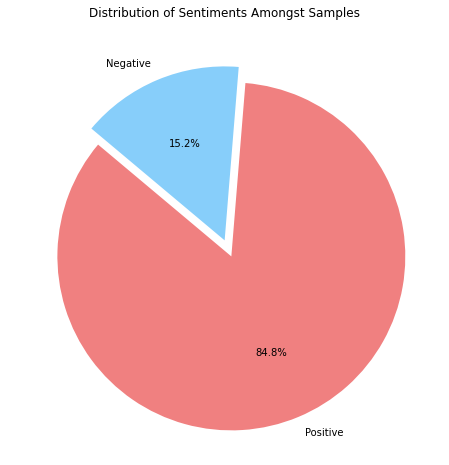

In [66]:
import matplotlib.pyplot as plt

# Remove rows where the "Rating" column is zero
df = df[df['Rating'] != 0]

# 'sentiment' based on the 'Rating'
df['sentiment'] = df['Rating'].apply(lambda rating: +1 if rating >= 4 else -1)

# Calculate the distribution of sentiments
sentiment_counts = df['sentiment'].value_counts()

# Plot a pie chart
labels = ['Positive', 'Negative']
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode the 1st slice (Positive)

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=labels, colors=colors, autopct='%1.1f%%', explode=explode, startangle=140)
plt.title('Distribution of Sentiments Amongst Samples')
plt.show()

In [67]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final
df['translated'] = df['translated'].apply(remove_punctuation)
df = df.dropna(subset=['translated'])
df['translated'] = df['translated'].apply(remove_punctuation)

In [68]:

# Create a new column 'sentiment' based on the 'Rating'
df['sentiment'] = df['Rating'].apply(lambda rating: +1 if rating >= 4 else -1)

# Create a new DataFrame with 'sentiment' and 'translated' columns
new_df = df[['sentiment', 'translated']]

# Display the first few rows of the new DataFrame
new_df.head()


,sentiment,translated
0,1,What to say My daughter LOVES him and I with h...
1,1,"I decided to test this plush to my grandson, j..."
2,1,"An unusual pet, this otter is beautiful Cute m..."
3,1,"Beautiful, soft and very relaxing It comes wit..."
4,1,"Plush tender, my 16-month-old loves it, sleeps..."


In [69]:
##Stemming
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')

# Assuming 'translated' is the column containing the text data
text_data = df['translated']

# Tokenization
tokenized_data = [word_tokenize(sentence) for sentence in text_data]

# Stopword Removal
stop_words = set(stopwords.words('english'))
filtered_data = [[word for word in sentence if word.lower() not in stop_words] for sentence in tokenized_data]

# Stemming
stemmer = PorterStemmer()
stemmed_data = [[stemmer.stem(word) for word in sentence] for sentence in filtered_data]

# Example: Displaying tokenized and stemmed data for the first few rows
for i in range(5):
    print(f"Original: {text_data.iloc[i]}")
    print(f"Tokenized: {tokenized_data[i]}")
    print(f"Stemmed: {stemmed_data[i]}\n")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sriha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sriha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Original: What to say My daughter LOVES him and I with her Very soft, zero visible seams, tender and especially functional It reproduces according to the choice of music, white noise, the sound of the Breath or heartbeat Also the otter tummy lights up and moves as if breathing For the newborn is a real comfort in the cradle, always kept in safety, I place it away from his face so that he can perceive it even just by touching it with his hand Wonderful purchase, we are really happy
Tokenized: ['What', 'to', 'say', 'My', 'daughter', 'LOVES', 'him', 'and', 'I', 'with', 'her', 'Very', 'soft', ',', 'zero', 'visible', 'seams', ',', 'tender', 'and', 'especially', 'functional', 'It', 'reproduces', 'according', 'to', 'the', 'choice', 'of', 'music', ',', 'white', 'noise', ',', 'the', 'sound', 'of', 'the', 'Breath', 'or', 'heartbeat', 'Also', 'the', 'otter', 'tummy', 'lights', 'up', 'and', 'moves', 'as', 'if', 'breathing', 'For', 'the', 'newborn', 'is', 'a', 'real', 'comfort', 'in', 'the', 'cradl

In [70]:
# Tokenization and Lemmatization¶
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Assuming 'translated' is the column containing the text data
text_data = df['translated']

# Tokenization
tokenized_data = [word_tokenize(sentence) for sentence in text_data]

# Stopword Removal
stop_words = set(stopwords.words('english'))
filtered_data = [[word for word in sentence if word.lower() not in stop_words] for sentence in tokenized_data]

# Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_data = [[lemmatizer.lemmatize(word) for word in sentence] for sentence in filtered_data]

# Example: Displaying tokenized and lemmatized data for the first few rows
for i in range(5):
    print(f"Original: {text_data.iloc[i]}")
    print(f"Tokenized: {tokenized_data[i]}")
    print(f"Lemmatized: {lemmatized_data[i]}\n")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sriha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sriha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sriha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93momw-1.4[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('omw-1.4')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/omw-1.4[0m

  Searched in:
    - 'C:\\Users\\sriha/nltk_data'
    - 'C:\\Users\\sriha\\anaconda3\\nltk_data'
    - 'C:\\Users\\sriha\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\sriha\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\sriha\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [71]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Adding a 'random_number' column for train-test split
index = df.index
df['random_number'] = np.random.randn(len(index))

# Train-test split
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

# Text vectorization using CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b', lowercase=True)  # Use lowercase tokens
train_matrix = vectorizer.fit_transform(train['translated'])
test_matrix = vectorizer.transform(test['translated'])

In [72]:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

ValueError: Found input variables with inconsistent numbers of samples: [307, 231]

In [73]:
print(classification_report(predictions,y_test))

ValueError: Found input variables with inconsistent numbers of samples: [307, 231]

In [74]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Assuming 'sentiment' is the target variable and 'translated' is the text feature
X_train = train_matrix
y_train = train['sentiment']

X_test = test_matrix
y_test = test['sentiment']

# Initialize the Naive Bayes model
naive_bayes_model = MultinomialNB()

# Train the model on the training data
naive_bayes_model.fit(X_train, y_train)

# Make predictions on the test data
predictions = naive_bayes_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Naive Bayes Model Accuracy: {accuracy}')



Naive Bayes Model Accuracy: 0.9154078549848943


In [75]:
# Generate a classification report
report = classification_report(y_test, predictions)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

          -1       0.82      0.55      0.66        49
           1       0.93      0.98      0.95       282

    accuracy                           0.92       331
   macro avg       0.87      0.76      0.81       331
weighted avg       0.91      0.92      0.91       331



In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
X_train = train_matrix
y_train = train['sentiment']

X_test = test_matrix
y_test = test['sentiment']

naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)
y_prob_nb = naive_bayes_model.predict_proba(X_test)[:, 1]
logistic_regression_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_regression_model.fit(X_train, y_train)
y_prob_lr = logistic_regression_model.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(8, 8))

plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot(fpr_lr, tpr_lr, color='green', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes and Logistic Regression Models')
plt.legend(loc="lower right")
plt.show()


NameError: name 'train_matrix' is not defined

In [50]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.


  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4


In [51]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming you already have a DataFrame named 'df' with the relevant columns
# Replace 'translated' with your actual column name

# Load and process textual features
text_column_name = 'translated'  # Replace with your actual column name
text_vectorizer = TfidfVectorizer()
text_features = text_vectorizer.fit_transform(df[text_column_name].astype(str))

# Assume 'sentiment' is the target variable
y = df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(text_features, y, test_size=0.2, random_state=42)

# Train a model (Random Forest classifier as an example)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Model Accuracy: {accuracy}')


Model Accuracy: 0.8925081433224755


Number of Trees: 10, Training Accuracy: 0.9962756052141527, Validation Accuracy: 0.9173913043478261
Number of Trees: 50, Training Accuracy: 1.0, Validation Accuracy: 0.9043478260869565
Number of Trees: 100, Training Accuracy: 1.0, Validation Accuracy: 0.8956521739130435
Number of Trees: 200, Training Accuracy: 1.0, Validation Accuracy: 0.9


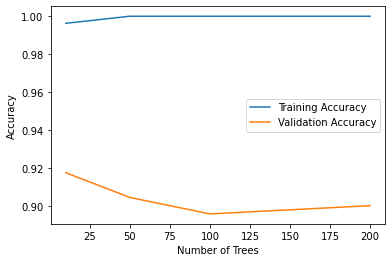

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# Load and process textual features
text_column_name = 'translated'  
text_vectorizer = TfidfVectorizer()
text_features = text_vectorizer.fit_transform(df[text_column_name].astype(str))

y = df['sentiment']

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(text_features, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define a range of number of trees (estimators)
num_trees_range = [10, 50, 100, 200]

# Lists to store accuracy values for plotting
train_accuracies = []
val_accuracies = []

for num_trees in num_trees_range:
    # Train a model (Random Forest classifier as an example) on the training set
    model = RandomForestClassifier(n_estimators=num_trees)
    model.fit(X_train, y_train)

    # Make predictions on the training set
    train_predictions = model.predict(X_train)
    
    # Make predictions on the validation set
    val_predictions = model.predict(X_val)

    # Calculate and store accuracies
    train_accuracy = accuracy_score(y_train, train_predictions)
    val_accuracy = accuracy_score(y_val, val_predictions)
    
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    print(f'Number of Trees: {num_trees}, Training Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}')

# Plot the training and validation accuracies
plt.plot(num_trees_range, train_accuracies, label='Training Accuracy')
plt.plot(num_trees_range, val_accuracies, label='Validation Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

# Tokenize the text data
max_words = 10000
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['translated'])  
sequences_train = tokenizer.texts_to_sequences(df['translated'])  

# Padding sequences to have the same length
max_sequence_length = max(len(seq) for seq in sequences_train)
padded_sequences_train = pad_sequences(sequences_train, maxlen=max_sequence_length)

# Encode the sentiment labels
label_encoder = LabelEncoder()
encoded_sentiments = label_encoder.fit_transform(df['sentiment'])
encoded_sentiments = to_categorical(encoded_sentiments)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences_train, encoded_sentiments, test_size=0.2, random_state=42)

# Build a simple LSTM model
embedding_dim = 50
num_classes = len(label_encoder.classes_)  
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(100))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model Accuracy: {accuracy}')


ModuleNotFoundError: No module named 'keras'

In [ ]:
pip install keras
